In [3]:
import spacy
from spacy.tokens import Doc, Span
import random
import csv
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import ast
import seaborn as sns
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt

C:\Users\Eakan PC\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [184]:
raw_df = pd.read_csv("E:\Graduation Project\job-recommendation\data preparation\scrape\webs\www.topcv.vn\jobs_data.csv")

In [185]:
raw_df.head(5)

,Unnamed: 0,title,job_link,company_link,company,deadline,overview,addresses,skills,job_details
0,0,Chuyên Viên Trải Nghiệm Khách Hàng Thu Nhập Lê...,https://www.topcv.vn/viec-lam/chuyen-vien-trai...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-dau-...,Công ty TNHH Đầu Tư BTGroup,14/03/2023,"{'Mức lương': '12-20 triệu', 'Số lượng tuyển':...",['Hải Phòng'],[],{'Mô tả công việc': '1. Đề xuất xây dựng hệ th...
1,1,Kỹ Sư Xây Dựng Qs/QC - Khối Dự Án (Thu Nhập Từ...,https://www.topcv.vn/viec-lam/ky-su-xay-dung-q...,https://www.topcv.vn/cong-ty/cong-ty-co-phan-t...,CÔNG TY CỔ PHẦN THIẾT KẾ VÀ XÂY DỰNG GIZA VIỆT...,30/03/2023,"{'Mức lương': '15-20 triệu', 'Số lượng tuyển':...","['Vĩnh Phúc', 'Hà Nam', 'Phú Thọ', 'Tây Ninh',...",[],{'Mô tả công việc': '- Kỹ sư Hiện trường:\n+ L...
2,2,Giáo Viên Giảng Dạy Kỹ Năng Sống ( 10 - 15 Tri...,https://www.topcv.vn/viec-lam/giao-vien-giang-...,https://www.topcv.vn/cong-ty/cong-ty-co-phan-p...,Công ty Cổ phần Phát triển Giáo dục quốc tế GAIA,17/03/2023,"{'Mức lương': '10-15 triệu', 'Số lượng tuyển':...","['Hồ Chí Minh: 137 Nguyễn Trọng Tuyển, phường ...",[],{'Mô tả công việc': 'CÔNG TY CỔ PHẦN PHÁT TRIỂ...
3,3,Chuyên Viên Tư Vấn Tài Chính Bảo Hiểm Từ 23T (...,https://www.topcv.vn/viec-lam/chuyen-vien-tu-v...,https://www.topcv.vn/cong-ty/nest-by-aia-ngo-q...,NEST BY AIA NGÔ QUYỀN,30/03/2023,"{'Mức lương': 'Trên 16.8 triệu', 'Số lượng tuy...","['Hà Nội: Số 17 Ngô Quyền, Quận Hoàn Kiếm, TP ...",[],"{'Mô tả công việc': '- Tìm kiếm, tiếp cận và x..."
4,4,Chuyên Viên Tuyển Dụng - Nhận Việc Ngay,https://www.topcv.vn/viec-lam/chuyen-vien-tuye...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-tmdv...,CÔNG TY TNHH TMDV BLUE SEA,25/03/2023,"{'Mức lương': '10-12 triệu', 'Số lượng tuyển':...","['Hồ Chí Minh: Tòa nhà Sumikura, Tầng 2 – 18H ...","['Kỹ năng giao tiếp', 'Tin học văn phòng', 'Đà...",{'Mô tả công việc': '•\tTiếp nhận nhu cầu va...


In [186]:
raw_df.tail(5)

,Unnamed: 0,title,job_link,company_link,company,deadline,overview,addresses,skills,job_details
18196,Nhân Viên Thiết Kế Đi Làm Ngay,https://www.topcv.vn/viec-lam/nhan-vien-thiet-...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-dich...,CÔNG TY TNHH DỊCH VỤ VÀ SẢN XUẤT BAO BÌ BIG SUN,28/03/2023,"{'Mức lương': '7-10 triệu', 'Số lượng tuyển': ...","['Hà Nội: Số 200 Khu đô thị Đại Từ, Hoàng Mai']",[],{'Mô tả công việc': '- Thiết kế và in các sản ...,NaN
18197,Nhân Viên Sales Thị Trường - Thu Nhập Từ 10 Triệu,https://www.topcv.vn/viec-lam/nhan-vien-sales-...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-mtv-...,Công ty TNHH MTV TM&DV Đại Á,31/03/2023,"{'Mức lương': 'Tới 20 triệu', 'Số lượng tuyển'...",['Hồ Chí Minh: 47 Hoàng Trọng Mậu phường Tân H...,[],"{'Mô tả công việc': '+ Tư vấn, giới thiệu sản ...",NaN
18198,"Nhân Viên Kinh Doanh Quà Tặng, In Ấn Quảng Cáo...",https://www.topcv.vn/viec-lam/nhan-vien-kinh-d...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-phat...,CÔNG TY TNHH PHÁT TRIỂN QUÀ TẶNG QUẢNG CÁO SON...,16/03/2023,"{'Mức lương': '12-15 triệu', 'Số lượng tuyển':...","['Hồ Chí Minh: Tòa nhà Song Hành, số 34 Huỳnh ...",[],{'Mô tả công việc': '- Duy trì khách hàng hiện...,NaN
18199,Nhân Viên Triển Khai Kết Cấu Công Trình Xây Dự...,https://www.topcv.vn/viec-lam/nhan-vien-trien-...,https://www.topcv.vn/cong-ty/cong-ty-cp-tu-van...,Công Ty CP Tư Vấn Và Thiết Kế Xây Dựng VTEK Vi...,25/03/2023,"{'Mức lương': 'Thoả thuận', 'Số lượng tuyển': ...","['Hà Nội: 289A KHUẤT DUY TIẾN., Cầu Giấy']","['Phần mềm tekla', 'Đọc hiểu']",{'Mô tả công việc': '- Triển khai model và bản...,NaN
18200,Nhân Viên IT,https://www.topcv.vn/viec-lam/nhan-vien-it/930...,https://www.topcv.vn/cong-ty/cong-ty-co-phan-g...,Công ty Cổ phần Giáo dục Bảo An,15/04/2023,"{'Mức lương': '8-10 triệu', 'Số lượng tuyển': ...","['Hà Nội: Số 20 Ngõ 56 Võ Văn Dũng, Đống Đa']",['Kỹ năng giao tiếp'],{'Mô tả công việc': '• Xử lý các công việc kỹ ...,NaN


In [187]:
raw_df.shape

(18201, 10)

In [188]:
mask = pd.isnull(raw_df.iloc[:, -1])
raw_df.loc[mask, :] = pd.concat([pd.DataFrame({'Column_0': np.NaN}, index=mask.loc[mask].index), raw_df.loc[mask, :].shift(1, axis=1)], axis=1)

In [189]:
raw_df = raw_df.drop(columns=['Unnamed: 0'])

In [190]:
raw_df

,title,job_link,company_link,company,deadline,overview,addresses,skills,job_details
0,Chuyên Viên Trải Nghiệm Khách Hàng Thu Nhập Lê...,https://www.topcv.vn/viec-lam/chuyen-vien-trai...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-dau-...,Công ty TNHH Đầu Tư BTGroup,14/03/2023,"{'Mức lương': '12-20 triệu', 'Số lượng tuyển':...",['Hải Phòng'],[],{'Mô tả công việc': '1. Đề xuất xây dựng hệ th...
1,Kỹ Sư Xây Dựng Qs/QC - Khối Dự Án (Thu Nhập Từ...,https://www.topcv.vn/viec-lam/ky-su-xay-dung-q...,https://www.topcv.vn/cong-ty/cong-ty-co-phan-t...,CÔNG TY CỔ PHẦN THIẾT KẾ VÀ XÂY DỰNG GIZA VIỆT...,30/03/2023,"{'Mức lương': '15-20 triệu', 'Số lượng tuyển':...","['Vĩnh Phúc', 'Hà Nam', 'Phú Thọ', 'Tây Ninh',...",[],{'Mô tả công việc': '- Kỹ sư Hiện trường:\n+ L...
2,Giáo Viên Giảng Dạy Kỹ Năng Sống ( 10 - 15 Tri...,https://www.topcv.vn/viec-lam/giao-vien-giang-...,https://www.topcv.vn/cong-ty/cong-ty-co-phan-p...,Công ty Cổ phần Phát triển Giáo dục quốc tế GAIA,17/03/2023,"{'Mức lương': '10-15 triệu', 'Số lượng tuyển':...","['Hồ Chí Minh: 137 Nguyễn Trọng Tuyển, phường ...",[],{'Mô tả công việc': 'CÔNG TY CỔ PHẦN PHÁT TRIỂ...
3,Chuyên Viên Tư Vấn Tài Chính Bảo Hiểm Từ 23T (...,https://www.topcv.vn/viec-lam/chuyen-vien-tu-v...,https://www.topcv.vn/cong-ty/nest-by-aia-ngo-q...,NEST BY AIA NGÔ QUYỀN,30/03/2023,"{'Mức lương': 'Trên 16.8 triệu', 'Số lượng tuy...","['Hà Nội: Số 17 Ngô Quyền, Quận Hoàn Kiếm, TP ...",[],"{'Mô tả công việc': '- Tìm kiếm, tiếp cận và x..."
4,Chuyên Viên Tuyển Dụng - Nhận Việc Ngay,https://www.topcv.vn/viec-lam/chuyen-vien-tuye...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-tmdv...,CÔNG TY TNHH TMDV BLUE SEA,25/03/2023,"{'Mức lương': '10-12 triệu', 'Số lượng tuyển':...","['Hồ Chí Minh: Tòa nhà Sumikura, Tầng 2 – 18H ...","['Kỹ năng giao tiếp', 'Tin học văn phòng', 'Đà...",{'Mô tả công việc': '•\tTiếp nhận nhu cầu va...
...,...,...,...,...,...,...,...,...,...
18196,Nhân Viên Thiết Kế Đi Làm Ngay,https://www.topcv.vn/viec-lam/nhan-vien-thiet-...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-dich...,CÔNG TY TNHH DỊCH VỤ VÀ SẢN XUẤT BAO BÌ BIG SUN,28/03/2023,"{'Mức lương': '7-10 triệu', 'Số lượng tuyển': ...","['Hà Nội: Số 200 Khu đô thị Đại Từ, Hoàng Mai']",[],{'Mô tả công việc': '- Thiết kế và in các sản ...
18197,Nhân Viên Sales Thị Trường - Thu Nhập Từ 10 Triệu,https://www.topcv.vn/viec-lam/nhan-vien-sales-...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-mtv-...,Công ty TNHH MTV TM&DV Đại Á,31/03/2023,"{'Mức lương': 'Tới 20 triệu', 'Số lượng tuyển'...",['Hồ Chí Minh: 47 Hoàng Trọng Mậu phường Tân H...,[],"{'Mô tả công việc': '+ Tư vấn, giới thiệu sản ..."
18198,"Nhân Viên Kinh Doanh Quà Tặng, In Ấn Quảng Cáo...",https://www.topcv.vn/viec-lam/nhan-vien-kinh-d...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-phat...,CÔNG TY TNHH PHÁT TRIỂN QUÀ TẶNG QUẢNG CÁO SON...,16/03/2023,"{'Mức lương': '12-15 triệu', 'Số lượng tuyển':...","['Hồ Chí Minh: Tòa nhà Song Hành, số 34 Huỳnh ...",[],{'Mô tả công việc': '- Duy trì khách hàng hiện...
18199,Nhân Viên Triển Khai Kết Cấu Công Trình Xây Dự...,https://www.topcv.vn/viec-lam/nhan-vien-trien-...,https://www.topcv.vn/cong-ty/cong-ty-cp-tu-van...,Công Ty CP Tư Vấn Và Thiết Kế Xây Dựng VTEK Vi...,25/03/2023,"{'Mức lương': 'Thoả thuận', 'Số lượng tuyển': ...","['Hà Nội: 289A KHUẤT DUY TIẾN., Cầu Giấy']","['Phần mềm tekla', 'Đọc hiểu']",{'Mô tả công việc': '- Triển khai model và bản...


In [191]:
df = raw_df.copy()

In [192]:
df['overview'] = df['overview'].apply(ast.literal_eval)

In [193]:
df['Mức lương'] = df['overview'].apply(lambda x: x['Mức lương'])
df['Số lượng tuyển'] = df['overview'].apply(lambda x: x['Số lượng tuyển'])
df['Hình thức làm việc'] = df['overview'].apply(lambda x: x['Hình thức làm việc'])
df['Cấp bậc'] = df['overview'].apply(lambda x: x['Cấp bậc'])
df['Giới tính'] = df['overview'].apply(lambda x: x['Giới tính'])
df['Kinh nghiệm'] = df['overview'].apply(lambda x: x['Kinh nghiệm'])

In [194]:
df['job_details'] = df['job_details'].apply(ast.literal_eval)

In [195]:
df['Mô tả công việc'] = df['job_details'].apply(lambda x: x['Mô tả công việc'])
df['Yêu cầu ứng viên'] = df['job_details'].apply(lambda x: x['Yêu cầu ứng viên'])
df['Quyền lợi'] = df['job_details'].apply(lambda x: x['Quyền lợi'])

In [196]:
#df.head(10)
df = df.drop(columns=['overview'])
df = df.drop(columns=['job_details'])

In [197]:
df['addresses'] = df['addresses'].apply(lambda x: ast.literal_eval(x))

In [198]:
df['skills'] = df['skills'].apply(lambda x: ast.literal_eval(x))

In [199]:
df.skills[4]

['Kỹ năng giao tiếp', 'Tin học văn phòng', 'Đàm phán thương lượng']

In [200]:
df

,title,job_link,company_link,company,deadline,addresses,skills,Mức lương,Số lượng tuyển,Hình thức làm việc,Cấp bậc,Giới tính,Kinh nghiệm,Mô tả công việc,Yêu cầu ứng viên,Quyền lợi
0,Chuyên Viên Trải Nghiệm Khách Hàng Thu Nhập Lê...,https://www.topcv.vn/viec-lam/chuyen-vien-trai...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-dau-...,Công ty TNHH Đầu Tư BTGroup,14/03/2023,[Hải Phòng],[],12-20 triệu,1 người,Toàn thời gian,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,1. Đề xuất xây dựng hệ thống trải nghiệm khách...,1.Kiến thức chuyên môn:- Có kinh nghiệm quản l...,"1.Thu nhập: từ 12 đến 20 triệu tùy năng lực, n..."
1,Kỹ Sư Xây Dựng Qs/QC - Khối Dự Án (Thu Nhập Từ...,https://www.topcv.vn/viec-lam/ky-su-xay-dung-q...,https://www.topcv.vn/cong-ty/cong-ty-co-phan-t...,CÔNG TY CỔ PHẦN THIẾT KẾ VÀ XÂY DỰNG GIZA VIỆT...,30/03/2023,"[Vĩnh Phúc, Hà Nam, Phú Thọ, Tây Ninh, Hải Phò...",[],15-20 triệu,10 người,Toàn thời gian,Nhân viên,Không yêu cầu,2 năm,- Kỹ sư Hiện trường:\n+ Lập tiến độ tổng và ch...,- Tốt nghiệp các trường đại học chuyên ngành c...,"- Lương: cạnh tranh, cực hấp dẫn với thị trườn..."
2,Giáo Viên Giảng Dạy Kỹ Năng Sống ( 10 - 15 Tri...,https://www.topcv.vn/viec-lam/giao-vien-giang-...,https://www.topcv.vn/cong-ty/cong-ty-co-phan-p...,Công ty Cổ phần Phát triển Giáo dục quốc tế GAIA,17/03/2023,"[Hồ Chí Minh: 137 Nguyễn Trọng Tuyển, phường 8...",[],10-15 triệu,5 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,CÔNG TY CỔ PHẦN PHÁT TRIỂN GIÁO DỤC QUỐC TẾ GA...,"- Tốt nghiệp Đại học, Cao đẳng sư phạm, chuyên...",- Lương 6.000.000 – 8.000.000 vnd + Trợ cấp + ...
3,Chuyên Viên Tư Vấn Tài Chính Bảo Hiểm Từ 23T (...,https://www.topcv.vn/viec-lam/chuyen-vien-tu-v...,https://www.topcv.vn/cong-ty/nest-by-aia-ngo-q...,NEST BY AIA NGÔ QUYỀN,30/03/2023,"[Hà Nội: Số 17 Ngô Quyền, Quận Hoàn Kiếm, TP H...",[],Trên 16.8 triệu,5 người,Toàn thời gian,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,"- Tìm kiếm, tiếp cận và xây dựng mối quan hệ v...",Độ tuổi từ 23 tuổi trở lên ( từ 2000 trở lên.....,LƯƠNG CỐ ĐỊNH: 16.000.000 - 24.000.000 VNĐ/ th...
4,Chuyên Viên Tuyển Dụng - Nhận Việc Ngay,https://www.topcv.vn/viec-lam/chuyen-vien-tuye...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-tmdv...,CÔNG TY TNHH TMDV BLUE SEA,25/03/2023,"[Hồ Chí Minh: Tòa nhà Sumikura, Tầng 2 – 18H C...","[Kỹ năng giao tiếp, Tin học văn phòng, Đàm phá...",10-12 triệu,1 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,•\tTiếp nhận nhu cầu và lập kế hoạch tuy...,•\tCó tối thiểu ít nhất 1 năm kinh nghiệm vị ...,• Mức lương cứng từ 10 – 12tr (lương thỏa thuậ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18196,Nhân Viên Thiết Kế Đi Làm Ngay,https://www.topcv.vn/viec-lam/nhan-vien-thiet-...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-dich...,CÔNG TY TNHH DỊCH VỤ VÀ SẢN XUẤT BAO BÌ BIG SUN,28/03/2023,"[Hà Nội: Số 200 Khu đô thị Đại Từ, Hoàng Mai]",[],7-10 triệu,1 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,"- Thiết kế và in các sản phẩm : Lịch, Tạp chí,...",- 1 năm kinh nghiệm tại vị trí tương đương- Ưu...,- Lương cơ bản + thưởng- Thưởng cuối năm và th...
18197,Nhân Viên Sales Thị Trường - Thu Nhập Từ 10 Triệu,https://www.topcv.vn/viec-lam/nhan-vien-sales-...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-mtv-...,Công ty TNHH MTV TM&DV Đại Á,31/03/2023,[Hồ Chí Minh: 47 Hoàng Trọng Mậu phường Tân Hư...,[],Tới 20 triệu,3 người,Toàn thời gian,Nhân viên,Nam,1 năm,"+ Tư vấn, giới thiệu sản phẩm máy lọc nước , m...",+ Ưu tiên có kinh nghiệm sale ngành bất động s...,+Thu nhập: 10-20 triệu. Gồm : Lương cứng + phụ...
18198,"Nhân Viên Kinh Doanh Quà Tặng, In Ấn Quảng Cáo...",https://www.topcv.vn/viec-lam/nhan-vien-kinh-d...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-phat...,CÔNG TY TNHH PHÁT TRIỂN QUÀ TẶNG QUẢNG CÁO SON...,16/03/2023,"[Hồ Chí Minh: Tòa nhà Song Hành, số 34 Huỳnh T...",[],12-15 triệu,6 người,Toàn thời gian,Nhân viên,Nữ,1 năm,"- Duy trì khách hàng hiện có, tìm kiếm mở rộng...",- Giới tính: Nữ\n- Có kinh nghiệm 1 năm trở lê...,- Thu nhậ

In [201]:
df['deadline'] = pd.to_datetime(df['deadline'])

C:\Users\Eakan PC\AppData\Local\Temp\ipykernel_7880\35916101.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['deadline'] = pd.to_datetime(df['deadline'])


In [202]:
df['deadline']

0       2023-03-14
1       2023-03-30
2       2023-03-17
3       2023-03-30
4       2023-03-25
           ...    
18196   2023-03-28
18197   2023-03-31
18198   2023-03-16
18199   2023-03-25
18200   2023-04-15
Name: deadline, Length: 18201, dtype: datetime64[ns]

In [203]:
df['Số lượng tuyển'] = df['Số lượng tuyển'].str.replace(' người', '').astype(int)
df.head()

,title,job_link,company_link,company,deadline,addresses,skills,Mức lương,Số lượng tuyển,Hình thức làm việc,Cấp bậc,Giới tính,Kinh nghiệm,Mô tả công việc,Yêu cầu ứng viên,Quyền lợi
0,Chuyên Viên Trải Nghiệm Khách Hàng Thu Nhập Lê...,https://www.topcv.vn/viec-lam/chuyen-vien-trai...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-dau-...,Công ty TNHH Đầu Tư BTGroup,2023-03-14,[Hải Phòng],[],12-20 triệu,1,Toàn thời gian,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,1. Đề xuất xây dựng hệ thống trải nghiệm khách...,1.Kiến thức chuyên môn:- Có kinh nghiệm quản l...,"1.Thu nhập: từ 12 đến 20 triệu tùy năng lực, n..."
1,Kỹ Sư Xây Dựng Qs/QC - Khối Dự Án (Thu Nhập Từ...,https://www.topcv.vn/viec-lam/ky-su-xay-dung-q...,https://www.topcv.vn/cong-ty/cong-ty-co-phan-t...,CÔNG TY CỔ PHẦN THIẾT KẾ VÀ XÂY DỰNG GIZA VIỆT...,2023-03-30,"[Vĩnh Phúc, Hà Nam, Phú Thọ, Tây Ninh, Hải Phò...",[],15-20 triệu,10,Toàn thời gian,Nhân viên,Không yêu cầu,2 năm,- Kỹ sư Hiện trường:\n+ Lập tiến độ tổng và ch...,- Tốt nghiệp các trường đại học chuyên ngành c...,"- Lương: cạnh tranh, cực hấp dẫn với thị trườn..."
2,Giáo Viên Giảng Dạy Kỹ Năng Sống ( 10 - 15 Tri...,https://www.topcv.vn/viec-lam/giao-vien-giang-...,https://www.topcv.vn/cong-ty/cong-ty-co-phan-p...,Công ty Cổ phần Phát triển Giáo dục quốc tế GAIA,2023-03-17,"[Hồ Chí Minh: 137 Nguyễn Trọng Tuyển, phường 8...",[],10-15 triệu,5,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,CÔNG TY CỔ PHẦN PHÁT TRIỂN GIÁO DỤC QUỐC TẾ GA...,"- Tốt nghiệp Đại học, Cao đẳng sư phạm, chuyên...",- Lương 6.000.000 – 8.000.000 vnd + Trợ cấp + ...
3,Chuyên Viên Tư Vấn Tài Chính Bảo Hiểm Từ 23T (...,https://www.topcv.vn/viec-lam/chuyen-vien-tu-v...,https://www.topcv.vn/cong-ty/nest-by-aia-ngo-q...,NEST BY AIA NGÔ QUYỀN,2023-03-30,"[Hà Nội: Số 17 Ngô Quyền, Quận Hoàn Kiếm, TP H...",[],Trên 16.8 triệu,5,Toàn thời gian,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,"- Tìm kiếm, tiếp cận và xây dựng mối quan hệ v...",Độ tuổi từ 23 tuổi trở lên ( từ 2000 trở lên.....,LƯƠNG CỐ ĐỊNH: 16.000.000 - 24.000.000 VNĐ/ th...
4,Chuyên Viên Tuyển Dụng - Nhận Việc Ngay,https://www.topcv.vn/viec-lam/chuyen-vien-tuye...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-tmdv...,CÔNG TY TNHH TMDV BLUE SEA,2023-03-25,"[Hồ Chí Minh: Tòa nhà Sumikura, Tầng 2 – 18H C...","[Kỹ năng giao tiếp, Tin học văn phòng, Đàm phá...",10-12 triệu,1,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,•\tTiếp nhận nhu cầu và lập kế hoạch tuy...,•\tCó tối thiểu ít nhất 1 năm kinh nghiệm vị ...,• Mức lương cứng từ 10 – 12tr (lương thỏa thuậ...


In [204]:
df['Kinh nghiệm'] = df['Kinh nghiệm'].str.replace(' năm', '')
df['Kinh nghiệm'] = df['Kinh nghiệm'].str.replace('Không yêu cầu kinh nghiệm', '0')
df['Kinh nghiệm'] = df['Kinh nghiệm'].str.replace('Dưới ', '<')
df['Kinh nghiệm'] = df['Kinh nghiệm'].str.replace('Trên ', '>')
df

,title,job_link,company_link,company,deadline,addresses,skills,Mức lương,Số lượng tuyển,Hình thức làm việc,Cấp bậc,Giới tính,Kinh nghiệm,Mô tả công việc,Yêu cầu ứng viên,Quyền lợi
0,Chuyên Viên Trải Nghiệm Khách Hàng Thu Nhập Lê...,https://www.topcv.vn/viec-lam/chuyen-vien-trai...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-dau-...,Công ty TNHH Đầu Tư BTGroup,2023-03-14,[Hải Phòng],[],12-20 triệu,1,Toàn thời gian,Nhân viên,Không yêu cầu,0,1. Đề xuất xây dựng hệ thống trải nghiệm khách...,1.Kiến thức chuyên môn:- Có kinh nghiệm quản l...,"1.Thu nhập: từ 12 đến 20 triệu tùy năng lực, n..."
1,Kỹ Sư Xây Dựng Qs/QC - Khối Dự Án (Thu Nhập Từ...,https://www.topcv.vn/viec-lam/ky-su-xay-dung-q...,https://www.topcv.vn/cong-ty/cong-ty-co-phan-t...,CÔNG TY CỔ PHẦN THIẾT KẾ VÀ XÂY DỰNG GIZA VIỆT...,2023-03-30,"[Vĩnh Phúc, Hà Nam, Phú Thọ, Tây Ninh, Hải Phò...",[],15-20 triệu,10,Toàn thời gian,Nhân viên,Không yêu cầu,2,- Kỹ sư Hiện trường:\n+ Lập tiến độ tổng và ch...,- Tốt nghiệp các trường đại học chuyên ngành c...,"- Lương: cạnh tranh, cực hấp dẫn với thị trườn..."
2,Giáo Viên Giảng Dạy Kỹ Năng Sống ( 10 - 15 Tri...,https://www.topcv.vn/viec-lam/giao-vien-giang-...,https://www.topcv.vn/cong-ty/cong-ty-co-phan-p...,Công ty Cổ phần Phát triển Giáo dục quốc tế GAIA,2023-03-17,"[Hồ Chí Minh: 137 Nguyễn Trọng Tuyển, phường 8...",[],10-15 triệu,5,Toàn thời gian,Nhân viên,Không yêu cầu,1,CÔNG TY CỔ PHẦN PHÁT TRIỂN GIÁO DỤC QUỐC TẾ GA...,"- Tốt nghiệp Đại học, Cao đẳng sư phạm, chuyên...",- Lương 6.000.000 – 8.000.000 vnd + Trợ cấp + ...
3,Chuyên Viên Tư Vấn Tài Chính Bảo Hiểm Từ 23T (...,https://www.topcv.vn/viec-lam/chuyen-vien-tu-v...,https://www.topcv.vn/cong-ty/nest-by-aia-ngo-q...,NEST BY AIA NGÔ QUYỀN,2023-03-30,"[Hà Nội: Số 17 Ngô Quyền, Quận Hoàn Kiếm, TP H...",[],Trên 16.8 triệu,5,Toàn thời gian,Nhân viên,Không yêu cầu,0,"- Tìm kiếm, tiếp cận và xây dựng mối quan hệ v...",Độ tuổi từ 23 tuổi trở lên ( từ 2000 trở lên.....,LƯƠNG CỐ ĐỊNH: 16.000.000 - 24.000.000 VNĐ/ th...
4,Chuyên Viên Tuyển Dụng - Nhận Việc Ngay,https://www.topcv.vn/viec-lam/chuyen-vien-tuye...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-tmdv...,CÔNG TY TNHH TMDV BLUE SEA,2023-03-25,"[Hồ Chí Minh: Tòa nhà Sumikura, Tầng 2 – 18H C...","[Kỹ năng giao tiếp, Tin học văn phòng, Đàm phá...",10-12 triệu,1,Toàn thời gian,Nhân viên,Không yêu cầu,1,•\tTiếp nhận nhu cầu và lập kế hoạch tuy...,•\tCó tối thiểu ít nhất 1 năm kinh nghiệm vị ...,• Mức lương cứng từ 10 – 12tr (lương thỏa thuậ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18196,Nhân Viên Thiết Kế Đi Làm Ngay,https://www.topcv.vn/viec-lam/nhan-vien-thiet-...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-dich...,CÔNG TY TNHH DỊCH VỤ VÀ SẢN XUẤT BAO BÌ BIG SUN,2023-03-28,"[Hà Nội: Số 200 Khu đô thị Đại Từ, Hoàng Mai]",[],7-10 triệu,1,Toàn thời gian,Nhân viên,Không yêu cầu,1,"- Thiết kế và in các sản phẩm : Lịch, Tạp chí,...",- 1 năm kinh nghiệm tại vị trí tương đương- Ưu...,- Lương cơ bản + thưởng- Thưởng cuối năm và th...
18197,Nhân Viên Sales Thị Trường - Thu Nhập Từ 10 Triệu,https://www.topcv.vn/viec-lam/nhan-vien-sales-...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-mtv-...,Công ty TNHH MTV TM&DV Đại Á,2023-03-31,[Hồ Chí Minh: 47 Hoàng Trọng Mậu phường Tân Hư...,[],Tới 20 triệu,3,Toàn thời gian,Nhân viên,Nam,1,"+ Tư vấn, giới thiệu sản phẩm máy lọc nước , m...",+ Ưu tiên có kinh nghiệm sale ngành bất động s...,+Thu nhập: 10-20 triệu. Gồm : Lương cứng + phụ...
18198,"Nhân Viên Kinh Doanh Quà Tặng, In Ấn Quảng Cáo...",https://www.topcv.vn/viec-lam/nhan-vien-kinh-d...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-phat...,CÔNG TY TNHH PHÁT TRIỂN QUÀ TẶNG QUẢNG CÁO SON...,2023-03-16,"[Hồ Chí Minh: Tòa nhà Song Hành, số 34 Huỳnh T...",[],12-15 triệu,6,Toàn thời gian,Nhân viên,Nữ,1,"- Duy trì khách hàng hiện có, tìm kiếm mở rộng...",- Giới tính: Nữ\n- Có kinh nghiệm 1 năm trở lê...,- Thu nhập: 12-15 triệu (lương + 3% hoa hồng)....
18199,Nhân Viên Triển Khai Kết Cấu Công Trình Xây Dự...,https://www.topcv.vn/vi

In [205]:
# Hàm đổi đơn vị
ty_gia = 23000

def doi_don_vi(x):
    if 'Trên' in x and 'USD' in x:
        # Xử lý dữ liệu có chữ "Trên"
        return 'Trên {:.1f} triệu'.format(round(float(x.split()[-2]) * ty_gia / 1000000, 2))
    if 'Tới' in x and 'USD' in x:
        # Xử lý dữ liệu có chữ "Trên"
        return 'Tới {:.1f} triệu'.format(round(float(x.split()[-2]) * ty_gia / 1000000, 2))
    if 'USD' in x:
        # Xử lý dữ liệu có chữ "USD"
        lst_luong = x.split()[0].split('-')
        if len(lst_luong) == 2:
            lst_luong = [round(float(luong) * ty_gia / 1000000, 1) for luong in lst_luong]
            return '{} - {} triệu'.format(lst_luong[0], lst_luong[1])
        else:
            return x
    return x

In [206]:
df['Mức lương'] = df['Mức lương'].str.replace(',', '', regex=True)

In [207]:
# Đổi đơn vị cột lương
df['Mức lương'] = df['Mức lương'].apply(doi_don_vi)
# Đổi từ trên thành >
df['Mức lương'] = df['Mức lương'].str.replace('Trên', '>')
df['Mức lương'] = df['Mức lương'].str.replace('Thoả thuận', '-1 triệu')

In [208]:
# Xóa chữ triệu
df['Mức lương'] = df['Mức lương'].str.replace(' triệu', '')

In [209]:
# Tách cột mức lương thành 2 cột min và max
def split_salary(salary):
    if salary == '-1':
        return pd.Series([-1, -1])
    elif '>' in salary:
        max_salary = np.inf
        min_salary = float(salary.split('> ')[-1])
    elif 'Tới' in salary:
        max_salary = float(salary.split('Tới ')[-1])
        min_salary = 0
    elif '-' in salary:
        min_salary, max_salary = [float(x) for x in salary.split('-')]
    else:
        min_salary = float(salary)
        max_salary = float(salary)
    return pd.Series([min_salary, max_salary])

df[['min_salary', 'max_salary']] = df['Mức lương'].apply(split_salary)

In [210]:
# bỏ cột mức lương khỏi dataframe
df = df.drop('Mức lương', axis=1)

In [211]:
df.shape

(18201, 17)

In [212]:
df.isnull().sum()

title                 0
job_link              0
company_link          0
company               0
deadline              0
addresses             0
skills                0
Số lượng tuyển        0
Hình thức làm việc    0
Cấp bậc               0
Giới tính             0
Kinh nghiệm           0
Mô tả công việc       0
Yêu cầu ứng viên      0
Quyền lợi             0
min_salary            0
max_salary            0
dtype: int64

In [213]:
Q1 = df['min_salary'].quantile(0.25)
Q3 = df['min_salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['min_salary'] >= lower_bound) & (df['min_salary'] <= upper_bound)]

In [216]:
Q1 = df['max_salary'].quantile(0.25)
Q3 = df['max_salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['max_salary'] >= lower_bound) & (df['max_salary'] <= upper_bound)]

In [ ]:
Q1 = df['max_salary'].quantile(0.25)
Q3 = df['max_salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['max_salary'] >= lower_bound) & (df['max_salary'] <= upper_bound)]

<AxesSubplot: >

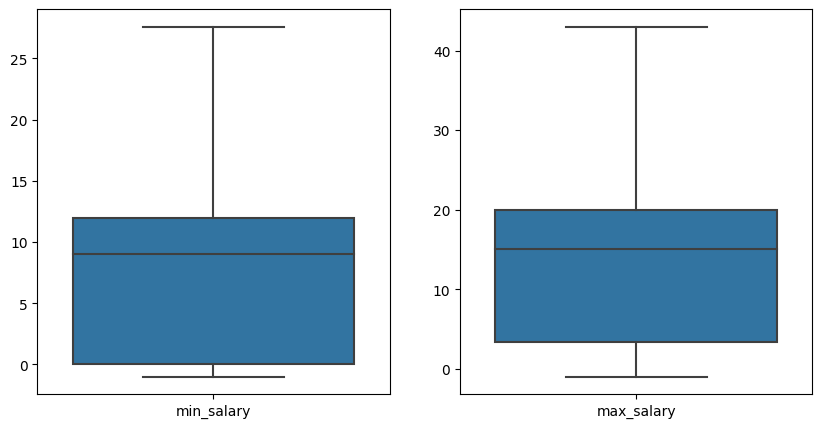

In [217]:
# Sau khi xử lý outlier
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

sns.boxplot(data=df[['min_salary']], ax=axes[0])
sns.boxplot(data=df[['max_salary']], ax=axes[1])

In [215]:
df.shape

(14215, 17)

In [219]:
df.to_csv("E:\Graduation Project\job-recommendation\data preparation\data extraction\cleaned_data.csv", index=False)

In [4]:
df_test = pd.read_csv("cleaned_data.csv")

In [224]:
df_test

,title,job_link,company_link,company,deadline,addresses,skills,Số lượng tuyển,Hình thức làm việc,Cấp bậc,Giới tính,Kinh nghiệm,Mô tả công việc,Yêu cầu ứng viên,Quyền lợi,min_salary,max_salary
0,Chuyên Viên Trải Nghiệm Khách Hàng Thu Nhập Lê...,https://www.topcv.vn/viec-lam/chuyen-vien-trai...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-dau-...,Công ty TNHH Đầu Tư BTGroup,2023-03-14,['Hải Phòng'],[],1,Toàn thời gian,Nhân viên,Không yêu cầu,0,1. Đề xuất xây dựng hệ thống trải nghiệm khách...,1.Kiến thức chuyên môn:- Có kinh nghiệm quản l...,"1.Thu nhập: từ 12 đến 20 triệu tùy năng lực, n...",12.0,20.0
1,Kỹ Sư Xây Dựng Qs/QC - Khối Dự Án (Thu Nhập Từ...,https://www.topcv.vn/viec-lam/ky-su-xay-dung-q...,https://www.topcv.vn/cong-ty/cong-ty-co-phan-t...,CÔNG TY CỔ PHẦN THIẾT KẾ VÀ XÂY DỰNG GIZA VIỆT...,2023-03-30,"['Vĩnh Phúc', 'Hà Nam', 'Phú Thọ', 'Tây Ninh',...",[],10,Toàn thời gian,Nhân viên,Không yêu cầu,2,- Kỹ sư Hiện trường:\n+ Lập tiến độ tổng và ch...,- Tốt nghiệp các trường đại học chuyên ngành c...,"- Lương: cạnh tranh, cực hấp dẫn với thị trườn...",15.0,20.0
2,Giáo Viên Giảng Dạy Kỹ Năng Sống ( 10 - 15 Tri...,https://www.topcv.vn/viec-lam/giao-vien-giang-...,https://www.topcv.vn/cong-ty/cong-ty-co-phan-p...,Công ty Cổ phần Phát triển Giáo dục quốc tế GAIA,2023-03-17,"['Hồ Chí Minh: 137 Nguyễn Trọng Tuyển, phường ...",[],5,Toàn thời gian,Nhân viên,Không yêu cầu,1,CÔNG TY CỔ PHẦN PHÁT TRIỂN GIÁO DỤC QUỐC TẾ GA...,"- Tốt nghiệp Đại học, Cao đẳng sư phạm, chuyên...",- Lương 6.000.000 – 8.000.000 vnd + Trợ cấp + ...,10.0,15.0
3,Chuyên Viên Tuyển Dụng - Nhận Việc Ngay,https://www.topcv.vn/viec-lam/chuyen-vien-tuye...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-tmdv...,CÔNG TY TNHH TMDV BLUE SEA,2023-03-25,"['Hồ Chí Minh: Tòa nhà Sumikura, Tầng 2 – 18H ...","['Kỹ năng giao tiếp', 'Tin học văn phòng', 'Đà...",1,Toàn thời gian,Nhân viên,Không yêu cầu,1,•\tTiếp nhận nhu cầu và lập kế hoạch tuy...,•\tCó tối thiểu ít nhất 1 năm kinh nghiệm vị ...,• Mức lương cứng từ 10 – 12tr (lương thỏa thuậ...,10.0,12.0
4,Chuyên Viên Tư Vấn Tài Chính Trực Tuyến (Hà Nộ...,https://www.topcv.vn/viec-lam/chuyen-vien-tu-v...,https://www.topcv.vn/cong-ty/ngan-hang-thuong-...,NGÂN HÀNG THƯƠNG MẠI CỔ PHẦN KỸ THƯƠNG VIỆT NAM,2023-03-16,"['Hà Nội', 'Hồ Chí Minh']",[],15,Toàn thời gian,Nhân viên,Không yêu cầu,0,- Tiếp nhận danh sách khách hàng đang sử dụng ...,- Tốt nghiệp đại học chuyên ngành Tài chính Ng...,- Mức lương khởi điểm: từ 10 -15 triệu + hoa h...,10.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13917,Nhân Viên Thiết Kế Đi Làm Ngay,https://www.topcv.vn/viec-lam/nhan-vien-thiet-...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-dich...,CÔNG TY TNHH DỊCH VỤ VÀ SẢN XUẤT BAO BÌ BIG SUN,2023-03-28,"['Hà Nội: Số 200 Khu đô thị Đại Từ, Hoàng Mai']",[],1,Toàn thời gian,Nhân viên,Không yêu cầu,1,"- Thiết kế và in các sản phẩm : Lịch, Tạp chí,...",- 1 năm kinh nghiệm tại vị trí tương đương- Ưu...,- Lương cơ bản + thưởng- Thưởng cuối năm và th...,7.0,10.0
13918,Nhân Viên Sales Thị Trường - Thu Nhập Từ 10 Triệu,https://www.topcv.vn/viec-lam/nhan-vien-sales-...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-mtv-...,Công ty TNHH MTV TM&DV Đại Á,2023-03-31,['Hồ Chí Minh: 47 Hoàng Trọng Mậu phường Tân H...,[],3,Toàn thời gian,Nhân viên,Nam,1,"+ Tư vấn, giới thiệu sản phẩm máy lọc nước , m...",+ Ưu tiên có kinh nghiệm sale ngành bất động s...,+Thu nhập: 10-20 triệu. Gồm : Lương cứng + phụ...,0.0,20.0
13919,"Nhân Viên Kinh Doanh Quà Tặng, In Ấn Quảng Cáo...",https://www.topcv.vn/viec-lam/nhan-vien-kinh-d...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-phat...,CÔNG TY TNHH PHÁT TRIỂN QUÀ TẶNG QUẢNG CÁO SON...,2023-03-16,"['Hồ Chí Minh: Tòa nhà Song Hành, số 34 Huỳnh ...",[],6,Toàn thời gian,Nhân viên,Nữ,1,"- Duy trì khách hàng hiện có, tìm kiếm mở rộng...",- Giới tính: Nữ\n- Có kinh nghiệm 1 năm trở lê...,- Thu nhập: 12-15 triệu (lương + 3% hoa hồng)....,12.0,15.0
13920,Nhân Viên Triển Khai Kết Cấu Công Trình Xây Dự...,https://www.topcv.vn/vie

In [23]:
print(df_test.iloc[13594])

title                 Phó Giám Đốc Kinh Doanh - Ban Điều Hành Siêu T...
job_link              https://www.topcv.vn/viec-lam/pho-giam-doc-kin...
company_link          https://www.topcv.vn/cong-ty/cong-ty-co-phan-t...
company                            Công ty Cổ phần Tập đoàn Mường Thanh
deadline                                                     2023-03-24
addresses             ['Hà Nội: Tầng 4, Tòa nhà Mường Thanh, Lô CC5,...
skills                                                               []
Số lượng tuyển                                                        1
Hình thức làm việc                                       Toàn thời gian
Cấp bậc                                                    Phó giám đốc
Giới tính                                                 Không yêu cầu
Kinh nghiệm                                                           3
Mô tả công việc       • Triển khai các công việc bán hàng; chịu trác...
Yêu cầu ứng viên      • Giới tính: Nam/nữ. Tốt nghiệp ĐH - CĐ, c

In [24]:
dff = pd.read_csv("filled_data.csv")

In [25]:
dff_subset = dff.loc[:, ['title', 'skills']]

In [28]:
dff_subset.to_csv("test_data.csv", index=False)

In [32]:
dff_subset[0:10]

,title,skills
0,Trợ Lý Trưởng Phòng Xuất Nhập Khẩu,"['PowerPoint', 'Microsoft Excel', 'Microsoft W..."
1,Chuyên Viên Sales / Kinh Doanh,['Kỹ năng Thuyết phục']
2,Sales Cum Social Media Liaison Position (Part-...,"['Advertising', 'Sales', 'English', 'Communica..."
3,Service Executive,['Business Analyst']
4,Nhân Viên Hành Chính Nhân Sự Thu Nhập 10-15 Tr...,"['Photoshop', 'Video Editing']"
5,Nhân Viên Marketing (Không Yêu Cầu Kinh Nghiệm...,"['Microsoft Office', 'Quản lý thời gian']"
6,Nhân Viên Tư Vấn,"['Kỹ năng giao tiếp', 'Kỹ năng lắng nghe']"
7,Quản Lý Cửa Hàng Thu Nhập Lên Đến 20 Triệu,"['Kỹ năng quản lý', 'Tin học văn phòng']"
8,Nhân Viên Kinh Doanh Ngành Vận Tải Đường Bộ,"['Word', 'PowerPoint', 'Excel cơ bản']"
9,Nhân Viên Tư Vấn Bán Hàng Đtdđ/Laptop [Fpt Sho...,"['Word', 'Kỹ năng giao tiếp', 'Tư vấn', 'Excel..."
